# Homework 3: Data Preparation

#### CPE232 Data Models

---


## Project setup


In [473]:
# !pip install matplotlib

In [474]:
import pandas as pd

df = pd.read_csv('bike_sharing_demand.csv')

In [475]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,NaN,0.0,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0,32
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0,13
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0,1


In [476]:
url = "https://kmutt.me/"

## 🔎 The Secret URL Challenge!

Welcome, brave explorer! Your mission, should you choose to accept it, is to uncover a hidden phrase scattered across the questions below. Each question holds a vital clue—a word or phrase—that will bring you closer to unlocking the **Secret URL**!

🕵️‍♂️ Once you have gathered all the hidden words, combine them **in order** and attach them to this URL:  
🔗 `https://kmutt.me/[your_combined_phrase]`

For example, if you discover the words `['quest', 'begin']`, your final URL will be:  
✨ `https://kmutt.me/questbegin` ✨

Are you ready to solve the mystery and reveal the secret link? Let the adventure begin! 🚀🔐


In [477]:
df.describe()

,year,month,hour,weekday,temp,feel_temp,humidity,windspeed,count
count,200.0,200.0,200.000000,200.000000,200.000000,200.000000,170.000000,200.000000,200.000000
mean,0.0,1.0,11.455000,3.160000,9.389000,11.689600,0.559059,13.745452,53.950000
std,0.0,0.0,6.832377,2.235933,3.713618,4.580663,0.176368,8.637962,48.931472
min,0.0,1.0,0.000000,0.000000,3.280000,3.030000,0.280000,0.000000,1.000000
25%,0.0,1.0,6.000000,1.000000,6.560000,9.090000,0.422500,7.001500,12.000000
50%,0.0,1.0,11.000000,3.000000,8.200000,10.985000,0.510000,12.998000,47.000000
75%,0.0,1.0,17.000000,5.000000,10.660000,13.635000,0.690000,19.250775,76.000000
max,0.0,1.0,23.000000,6.000000,18.860000,22.725000,1.000000,36.997400,219.000000


### Clue 1: 📜 A Note from the Keeper of the Winds 🌫️💨

"Traveler, the first clue hides in the mist! To uncover it, follow these steps carefully:"
\

1. Find the moment when the wind was strongest during misty weather. \
2. Look at that row and gather the numbers hidden in the hour and count columns. \
3. Add 65 to each number and turn them into letters. but divide count by 3. \
4. Arrange them in the order given by hour and count to reveal the hidden phrase! \

"Solve this mystery, and you will take the first step toward unlocking the secret URL!" 🔐✨

🐵 Monkey Mode Activated! 🍌

1. Ooo ooo! Find rows where weather is ‘mist’! 🌫️🐒 \
2. Pick the row with the BIGGEST windspeed! 💨💨 \
3. Grab hour and count columns and divide count by 3! 🕒🔢 \
4. Add 65 to each number! ➕6️⃣5️⃣ \
5. Turn those numbers into LETTERS! 🔠🐵 \

✨ Ooo OOO! Secret phrase unlocked! 🚀🔑


In [478]:
#  Find the moment when the wind was strongest during misty weather.
max_wind_speed_in_misty_weather = df[df["weather"] == "misty"]["windspeed"].max() # (fill methods and answers in [...])
target_row = df[(df["weather"] == "misty") & (df["windspeed"] == max_wind_speed_in_misty_weather)]

# get the hour and count of the target row
hour, count = target_row["hour"].values[0] + 65, target_row["count"].values[0]//3 + 65
# just change the hour and count to the corresponding ascii character
result = str(chr(hour)) + str(chr(count))

# # concatenate the result to the url
url = url + result
print("your current url is: ", url)

your current url is:  https://kmutt.me/LU


### 🔍 Clue 2: The Hidden Words in the Weather 🌦️

The next piece of the puzzle lies in the unique weathers that were observed! To find the clue:

1. Look at all the different weather conditions recorded in the dataset.
2. Take the last two word of each unique weather type you find.
3. The combination of these words will lead you to the next step in your adventure!
4. ✨ Unravel this mystery, and you'll be one step closer to the secret URL! 🚀🔐

Monkey Mode 🐵🍌

1. Ooo ooo! Find all the different weather types! 🌦️
2. Get the LAST TWO word of each one! 🦁🐒
3. Combine the words to move closer to the secret! 🔐✨

🍌 Monkey magic will lead you to the next clue! 🐵


In [479]:
# get the unique values of the target column
unique_values = df.weather.unique()
print(unique_values)
# get the last two characters of each unique value
last_two_character = list(map(lambda item : item[-2:],unique_values))

# join all the last two characters
result = "".join(last_two_character)

# concatenate the result to the url
url = url + result

print("your current url is: ", url)

['clear' 'misty' 'rain']
your current url is:  https://kmutt.me/LUartyin


## Clue 3: The missing Humidity 🌡️

Someone tried to hide a secret message in the humidity levels! you need to see this!!


<Axes: >

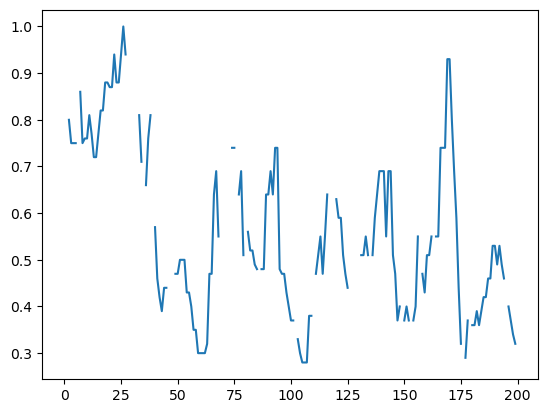

In [480]:
df["humidity"].plot()

In [481]:
df["humidity"].mean()

0.5590588235294117

Missing value in the `humidity` column make their average weird. \
Find the missing numbers and combine them to reveal the next part of the secret URL!

Monkey Mode 🐵🍌

1. Ooo ooo! Find the missing numbers in the humidity column! 🌡️🐒
2. Combine the missing numbers to reveal the next part of the secret URL! 🔐✨

🍌 This is too easy for us. You too you also can do it!🐒🐒🐵


In [482]:
df.isna().sum(axis=0)

season         0
year           0
month          0
hour           0
holiday        0
weekday        0
workingday     0
weather        0
temp           0
feel_temp      0
humidity      30
windspeed      0
count          0
dtype: int64

In [483]:
# get the number of missing values in humidity column
missing_values = df.humidity.isna().sum()
# concatenate the missing values to the url
url = url + str(missing_values)


print("your current url is: ", url)

your current url is:  https://kmutt.me/LUartyin30


### Clue 4: Make the Hum(idity)an back!

Yes! we got a number of missing humidity from the previous clue. Now, we need to make it back to the original data. This is too hard? [Don't worry about it](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.linkedin.com%2Fposts%2Favipathak99_coursera-genai-llm-activity-7087786100156448771-kQf7&psig=AOvVaw0EUk8ShOVQE_RbwPwe8Acj&ust=1738776320023000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCIDN9t7EqosDFQAAAAAdAAAAABAE) you can do it without my help.


In [484]:
# do it by yourself
# create function that interpolate the missing values in humidity column

# loop through the humidity column
for idx,value in enumerate(df.humidity):
    
    # check if the value is missing
    if pd.isnull(value): # checking by using pd.isnull() function
        # if the value is missing, interpolate it with the average of the previous and next value
        df.loc[idx, "humidity"] = (df.loc[idx - 1, "humidity"] + df.loc[idx + 1, "humidity"]) / 2


<Axes: >

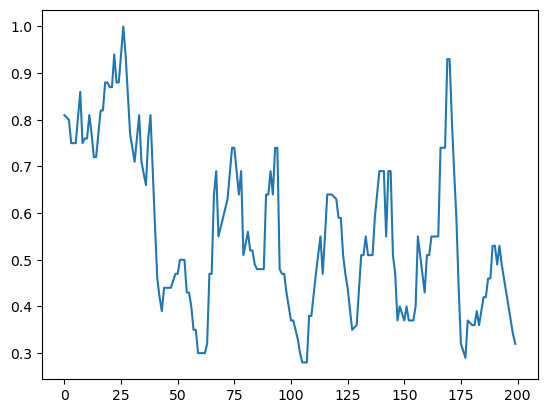

In [485]:
df["humidity"].plot()

now, find the average of the humidity column and add it to the missing value. Then, you will find the next part of the secret URL!


In [486]:
average_humidity = df.humidity.mean()

average_humidity

0.5575249999999999

oh, I forgot to tell you. We only use first 3 decimal places of the average value.


In [487]:
# get first 3 decimal of the average humidity
result = str(int(average_humidity*1000))

# concatenate the result to the url
url = url + result

print("your current url is: ", url)

your current url is:  https://kmutt.me/LUartyin30557


### Clue 5: The Secret Message from the different weathers 🌦️

We almost there! Find an average of each weather type in the dataset. Then use the ascii number of the sum between `clear` weather and difference of `misty` and `rain` weather to reveal the next part of the secret URL!

Monkey Mode 🐵🍌

1. Find the average of each weather type! 🌦️🐒
2. Use the ASCII number of the sum between `clear` weather and difference of `misty` and `rain` weather! 🔢🔠
3. Combine the numbers to reveal the next part of the secret URL! 🔐✨

🍌 You're almost there! Keep going! 🚀🐒🐒


In [488]:
df[df.weather=="rain"]["count"].mean()

28.25

In [489]:
# use groupby to get the average count of each weather
average_count = df.groupby(["weather"]).agg(avg_count = ("count","mean"))# get the average count of clear, misty, and rain weather
display(average_count)
clear_avg = average_count.loc["clear","avg_count"]
misty_avg = average_count.loc["misty","avg_count"]
rain_avg = average_count.loc["rain","avg_count"]

# # get the groupby_character follow by instructions
groupby_character = str(chr(int(clear_avg+(misty_avg-rain_avg))))
print(groupby_character)
# # concatenate the groupby_character to the url
url = url + groupby_character

print("your current url is: ", url)

,avg_count
weather,
clear,59.723881
misty,45.333333
rain,28.250000


L
your current url is:  https://kmutt.me/LUartyin30557L


In [490]:
print("your final url is: ", url)

your final url is:  https://kmutt.me/LUartyin30557L


### Clue 6: Fusion! 🌌

You've made it this far! Now, You just need to combine the dataframe and and get the standard deviation of `Number of employees` column. then put it in `decode` tools to reveal the final part of the secret URL!

Monkey Mode 🐵🍌

1. Combine the dataframe and get the standard deviation of `Number of employees` column! 🌌🐒
2. Use the standard deviation as a phrase to unlock the final part of the secret URL! 🔐✨
3. Put the phrase in the `decode` tools to reveal the final part of the secret URL! 🚀🔑

🍌 Don't be afraid.We will stay with you! 🙊🙉🙊🙉


In [491]:
organizations_1 = pd.read_csv('Organizations/organizations-1.csv')
organizations_2 = pd.read_csv('Organizations/organizations-2.csv')
organizations_3 = pd.read_csv('Organizations/organizations-3.csv')

In [492]:
organizations_1.head()

,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,FAB0d41d5b5d22c,Ferrell LLC,https://price.net/,Papua New Guinea,Horizontal empowering knowledgebase,1990,Plastics,3498
1,2,6A7EdDEA9FaDC52,"Mckinney, Riley and Day",http://www.hall-buchanan.info/,Finland,User-centric system-worthy leverage,2015,Glass / Ceramics / Concrete,4952
2,3,0bFED1ADAE4bcC1,Hester Ltd,http://sullivan-reed.com/,China,Switchable scalable moratorium,1971,Public Safety,5287
3,4,2bFC1Be8a4ce42f,Holder-Sellers,https://becker.com/,Turkmenistan,De-engineered systemic artificial intelligence,2004,Automotive,921
4,5,9eE8A6a4Eb96C24,Mayer Group,http://www.brewer.com/,Mauritius,Synchronized needs-based challenge,1991,Transportation,7870


In [493]:
def decode(value: float):
    value = str(int(value))
    
    return chr(int(value[:2]) + int(value[2:]))

In [494]:
# concat them together and get standard deviation of the column "employees"
concat_df = pd.concat([organizations_1,organizations_2,organizations_3],axis=0)
# get the standard deviation of the column "employees"
emp_std = concat_df['Number of employees'].std()
# show standard deviation
emp_std


2850.8597994927136

In [495]:
url = url + decode(emp_std) # your variable that contains the standard deviation

print("your current url is: ", url)

your current url is:  https://kmutt.me/LUartyin30557LN


## Final Clue: Pokemon configuration 🐱‍👤

You just need to add a new column call `stat` that will have a condition below:

1. stat calculate from `Attack` + `Defense` + `Speed` + `Sp. Atk` + `Sp. Def` + `HP`
1. If it have type `Normal`, `Grass`, `Fire` or `Water`. Attack will increase by 10%.
1. If it have type `Electric`, `Ice`, `Fighting` or `Poison`. Defense will increase by 10%.
1. If it have type `Ground`, `Flying`, `Psychic` or `Bug`. Speed will increase by 10%.
1. If it have type `Rock`, `Ghost`, `Dragon` or `Dark`. Sp. Atk will increase by 10%.
1. If It have `speed` more than 100. Sp. Def will increase by 50%.
1. If it is a `legendary` pokemon. HP will increase by 100.

Then, group by `Type 1` and find the average of `stat` column. This Clue is **important** you must do it, but I will give you the final part of the secret URL. The final part of the secret URL is `pikachu`.


In [496]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [497]:
# complete the Final Clue
def calculate_stat(row):
    if row["Type 1"] in ["Normal", "Grass", "Fire", "Water"] or row["Type 2"] in ["Normal", "Grass", "Fire", "Water"]:
        row["Attack"] *= 1.1
    
    if row["Type 1"] in ["Electric", "Ice", "Fighting", "Poison"] or row["Type 2"] in ["Electric", "Ice", "Fighting", "Poison"]:
        row["Defense"] *= 1.1
    
    if row["Type 1"] in ["Ground", "Flying", "Psychic", "Bug"] or row["Type 2"] in ["Ground", "Flying", "Psychic", "Bug"]:
        row["Speed"] *= 1.1
    
    if row["Type 1"] in ["Rock", "Ghost", "Dragon", "Dark"] or row["Type 2"] in ["Rock", "Ghost", "Dragon", "Dark"]:
        row["Sp. Atk"] *= 1.1
    
    if row["Speed"] > 100:
        row["Sp. Def"] *= 1.5
    
    if row["Legendary"]:
        row["HP"] += 100
    
    stat = row["Attack"] + row["Defense"] + row["Speed"] + row["Sp. Atk"] + row["Sp. Def"] + row["HP"]
    
    return stat

pokemon["stat"]=pokemon.apply(calculate_stat,axis=1)

pokemon.groupby("Type 1")["stat"].mean()

Type 1
Bug         394.291304
Dark        473.574194
Dragon      621.740625
Electric    474.172727
Fairy       419.764706
Fighting    429.766667
Fire        485.307692
Flying      580.050000
Ghost       462.118750
Grass       441.222857
Ground      466.575000
Ice         458.350000
Normal      419.938776
Poison      410.417857
Psychic     528.412281
Rock        478.136364
Steel       512.388889
Water       446.978571
Name: stat, dtype: float64

In [498]:
url = url + "pikachu"

print("your final url is: ", url)

your final url is:  https://kmutt.me/LUartyin30557LNpikachu


### Final Mission (Optional)

Access the secret URL and complete your quest! 🚀🔓

Question: What is the final secret URL? \
Ans: Yeah, that guy, WHY!!!. I spent like 2 days going through lab for getting rick rolled but at least I learned data Preparation

**note** [this](https://www.youtube.com/watch?v=dQw4w9WgXcQ) helps a lot on using dataframes

---

Enjoy the adventure! 🌟
